In [23]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

In [2]:
def get_data(file):
    angles = []
    distances = []

    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            angle, dist, quality = map(lambda x : float(x.split(':')[1]), line.split())
            angles.append(math.radians(angle))
            distances.append(dist)

    angles = np.array(angles)
    distances = np.array(distances)
    return angles, distances


In [32]:
def one_data_per_deg(file):
    seen = set()
    angles = []
    dists = []
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            angle, dist, quality = map(lambda x : float(x.split(':')[1]), line.split())
            angle = math.floor(angle)
            if angle not in seen:
                angles.append(math.radians(angle))
                dists.append(dist)
                seen.add(angle)

    return angles, dists

In [162]:
angles, distances = get_data("small_room_euclid/sm_points_3.txt")

points_x = np.int16(np.cos(angles) * distances)
points_y = np.int16(np.sin(angles) * distances)

print(points_x[0], points_y[0])

# points_x = np.cos(angles) * distances
# points_y = np.sin(angles) * distances


807 7
807 7


In [163]:
min_x, min_y = abs(min(points_x)), abs(min(points_y))
# offset points to 0,0
print(f'{min_x = } {min_y = }')
print(f'{points_x[0] = }, {points_y[0] = }')
points_x += min_x 
points_y += min_y

min_x = 2639 min_y = 5971
points_x[0] = 807, points_y[0] = 7
points_x[0] = 3446 points_y[0] = 5978


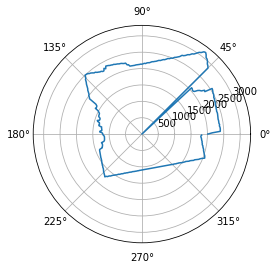

In [33]:
# angles, distances = get_data("small_room/sm_out_4.txt")
ang, dist = one_data_per_deg("small_room/sm_out_3.txt")
fig = plt.figure()
# plt.polar(angles, distances)
plt.polar(ang, dist)
plt.show()

In [3]:
ang_1, dist_1 = get_data("small_room/sm_out_1.txt")
ang_2, dist_2 = get_data("small_room/sm_out_2.txt")
ang_3, dist_3 = get_data("small_room/sm_out_3.txt")
ang_4, dist_4 = get_data("small_room/sm_out_4.txt")
ang_5, dist_5 = get_data("small_room/sm_out_5.txt")
ang_m, dist_m = get_data("small_room/sm_out_m.txt")
ang_wm, dist_wm = get_data("small_room/sm_out_wm.txt")
ang_side, dist_side = get_data("small_room/sm_out_side.txt")


NameError: name 'ang_4' is not defined

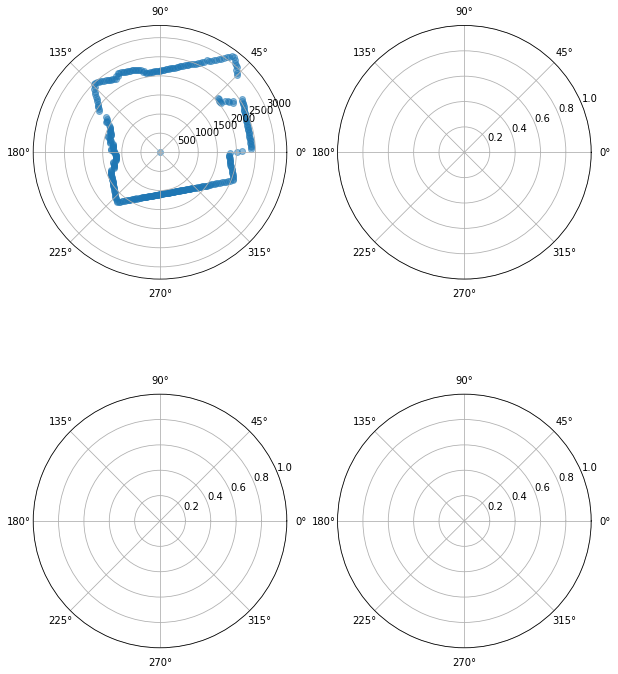

In [34]:
fig = plt.figure(figsize=(10, 26))

# points 3, 4, wm, side
ax1 = plt.subplot(4, 2, 1, projection='polar')
ax2 = plt.subplot(4, 2, 2, projection='polar')
ax3 = plt.subplot(4, 2, 3, projection='polar')
ax4 = plt.subplot(4, 2, 4, projection='polar')

ax1.scatter(ang_3, dist_3, cmap='hsv', alpha=0.5)
ax2.scatter(ang_4, dist_4, cmap='hsv', alpha=0.5)
ax3.scatter(ang_wm, dist_wm, cmap='hsv', alpha=0.5)
ax4.scatter(ang_side, dist_side, cmap='hsv', alpha=0.5)


#* points 1 and 2
# ax5 = plt.subplot(4, 2, 5, projection='polar')
# ax6 = plt.subplot(4, 2, 6, projection='polar')
# ax5.scatter(ang_1, dist_1, cmap='hsv', alpha=0.5)
# ax6.scatter(ang_2, dist_2, cmap='hsv', alpha=0.5)

#* points m and 5
# ax7 = plt.subplot(4, 2, 7, projection='polar')
# ax8 = plt.subplot(4, 2, 8, projection='polar')
# outlier due to mirror
# ax7.scatter(ang_5, dist_5, cmap='hsv', alpha=0.5)
# ax8.scatter(ang_m, dist_m, cmap='hsv', alpha=0.5)

plt.show()

In [60]:
def get_centroid(ang, dist):
    xs = np.cos(ang) * dist
    ys = np.sin(ang) * dist
    
    assert(len(xs) == len(ys))

    n = len(xs)

    x_center, y_center = 0, 0

    for x, y in zip(xs, ys):
        x_center += x
        y_center += y

    x_center /= n
    y_center /= n

    return x_center, y_center

In [61]:
get_centroid(ang_3, dist_3)

(145.92451620802788, 309.7678740897969)

In [63]:
get_centroid(ang_4, dist_4)

(120.82352116073444, 286.22180518171996)

In [64]:
get_centroid(ang_wm, dist_wm)

(244.8629866417516, 215.32774319207363)

In [65]:
get_centroid(ang_side, dist_side)

(121.21131766935532, 570.0031367107916)

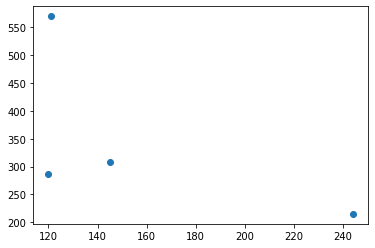

In [67]:
fig, ax = plt.subplots()
ax.scatter(x=[145, 120, 244, 121], y=[309, 286, 215, 570])
plt.show()